In [243]:
import pandas as pd
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
     mean_absolute_error, 
     mean_squared_error, 
     r2_score, explained_variance_score, 
     mean_squared_error,
     median_absolute_error,
     max_error,
     mean_absolute_percentage_error  )
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  # <-- imblearn Pipeline is required
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [245]:
sm = pd.read_excel('SMEs_Responses.xlsx')

C:\Users\HP\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
C:\Users\HP\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


In [247]:
sm.head()

,timestamp,business_type,num_employees,years_operation,annual_turnover,supplier_delays,transport_costs,inventory_access,currency_inflation,poor_infrastructure,...,accurate_sales_records,digital_sales_data,data_reliability,lack_standardized_data,limited_finances,lack_of_scaled_personnel,limited_IT_infrastructure,external_shocks,factors_influencing_bad_habits,challenges_before_data_tools
0,2025-10-04 21:03:44.450,Service,10-49,2-5 years,"Less than 50,000,",4,4,4,5,3,...,4,5,4,4,2,4,4,2,"For Ghanaian SMEs, demand forecasting should f...",Before SMEs can effectively use machine learni...
1,2025-10-04 21:34:59.777,Retail,1-9,>10 years,"500,000 - 999,999,",3,3,2,4,4,...,3,3,3,3,4,3,3,3,Customers Needs at Specific Times,Resource Constraints
2,2025-10-04 21:38:19.689,Service,10-49,2-5 years,"200,000 - 499,999,",3,4,3,4,3,...,4,4,3,4,3,3,3,4,Competition from rivals and other consumer lif...,Efficient collection of data
3,2025-10-04 21:58:59.387,Service,10-49,6-10 years,"Less than 50,000,",1,2,1,2,3,...,1,2,3,5,3,2,2,2,Yes,Yes
4,2025-10-04 22:44:57.520,Service,1-9,6-10 years,"1,000,000 - 4,999,999,",4,4,4,4,4,...,1,1,2,3,1,1,2,1,Good communication and advertising,Good teaching skills


In [249]:
sm.columns

Index(['timestamp', 'business_type', 'num_employees', 'years_operation',
       'annual_turnover', 'supplier_delays', 'transport_costs',
       'inventory_access', 'currency_inflation', 'poor_infrastructure',
       'demand_forecasting_challenges', 'seasonal_variations',
       'unpredictable_demand', 'informal_market_signals',
       'competitor_influence', 'accurate_sales_records', 'digital_sales_data',
       'data_reliability', 'lack_standardized_data', 'limited_finances',
       'lack_of_scaled_personnel', 'limited_IT_infrastructure',
       'external_shocks', 'factors_influencing_bad_habits',
       'challenges_before_data_tools'],
      dtype='object')

In [251]:
sm.describe()

,timestamp,supplier_delays,transport_costs,inventory_access,currency_inflation,poor_infrastructure,demand_forecasting_challenges,seasonal_variations,unpredictable_demand,informal_market_signals,competitor_influence,accurate_sales_records,digital_sales_data,data_reliability,lack_standardized_data,limited_finances,lack_of_scaled_personnel,limited_IT_infrastructure,external_shocks
count,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,2025-10-06 18:31:39.616818176,3.038961,3.571429,3.311688,3.649351,3.623377,3.155844,3.389610,3.454545,3.376623,3.207792,3.428571,3.389610,3.285714,3.324675,3.545455,3.337662,3.194805,3.415584
min,2025-10-04 21:03:44.450000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2025-10-05 13:31:12.614000128,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000
50%,2025-10-06 20:24:31.761999872,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000
75%,2025-10-07 20:50:10.375000064,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,2025-10-08 14:51:17.332000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,NaN,1.196943,1.056665,1.138556,1.189496,1.088685,1.026811,0.975433,1.094790,1.112595,1.080176,1.128909,1.137354,1.086486,1.105507,1.219852,1.131026,1.214376,1.195943


In [253]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   timestamp                       77 non-null     datetime64[ns]
 1   business_type                   77 non-null     object        
 2   num_employees                   77 non-null     object        
 3   years_operation                 77 non-null     object        
 4   annual_turnover                 77 non-null     object        
 5   supplier_delays                 77 non-null     int64         
 6   transport_costs                 77 non-null     int64         
 7   inventory_access                77 non-null     int64         
 8   currency_inflation              77 non-null     int64         
 9   poor_infrastructure             77 non-null     int64         
 10  demand_forecasting_challenges   77 non-null     int64         
 11  seasonal

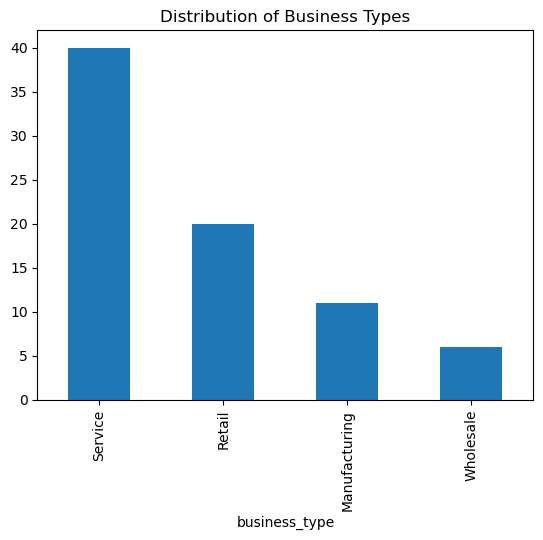

In [255]:
sm['business_type'].value_counts().plot(kind='bar')
plt.title("Distribution of Business Types")
plt.show()

The distribution of business types is positively skewed, with a dominant concentration in the service sector (40 responses). This is followed by retail (20), manufacturing (11), and wholesale (6). The skewness indicates an uneven representation across sectors, with service-oriented SMEs forming the modal category. This suggests that the dataset and likely the broader SME landscape is service-driven, reflecting limited participation from capital-intensive sectors such as manufacturing and wholesale.

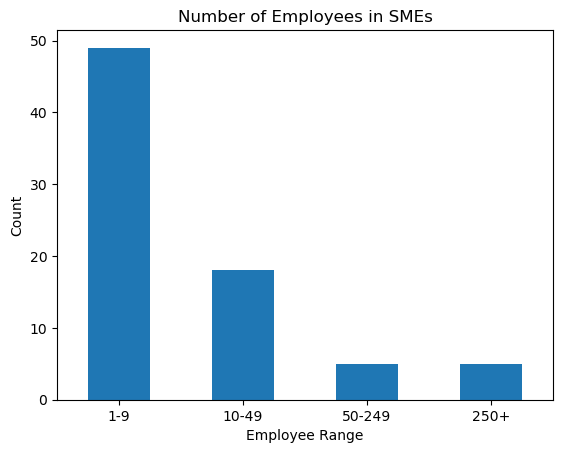

In [258]:
sm["num_employees"] = sm["num_employees"].astype(str)
sm['num_employees'].value_counts().plot(kind='bar')

plt.title("Number of Employees in SMEs")
plt.xlabel("Employee Range")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

The histogram reveals a positively skewed distribution of SME employee sizes, with a clear dominance of firms employing 1–9 workers(49). The number of enterprises decreases progressively across the higher ranges, with 10–49 employees(18) and only a small proportion having 50–249 (5) or 250+(5) employees. This distribution highlights that the SME sector is largely composed of micro-sized businesses, suggesting that most firms operate on a small scale with limited workforce capacity, a common characteristic in developing economies.

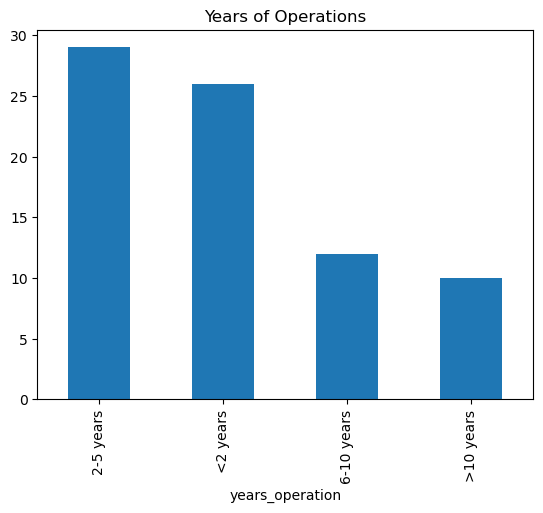

In [261]:
sm['years_operation'].value_counts().plot(kind='bar')
plt.title("Years of Operations")
plt.show()

Most of the respondents or entities are young businesses (under 5 years old), indicating a growing or emerging market with many new entrants. However, the sharp decline in numbers beyond 5 years suggests challenges in long-term business sustainability. Fewer firms remain operational after a decade.

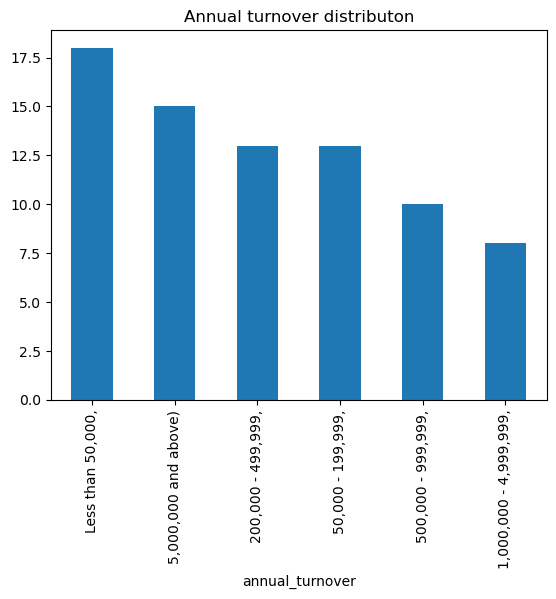

In [264]:
sm['annual_turnover'].value_counts().plot(kind='bar')
plt.title("Annual turnover distributon")
plt.show()

The distribution reveals a bimodal pattern, with a large number of businesses at both the very low and very high ends of the turnover spectrum. This suggests a polarized business environment, where many firms operate on a small scale while a smaller, but notable, group generates high revenues. The middle-income brackets have fewer businesses, indicating potential challenges in scaling from small to medium operations.

In [267]:
sm1=sm.drop(columns=['factors_influencing_bad_habits','challenges_before_data_tools'])

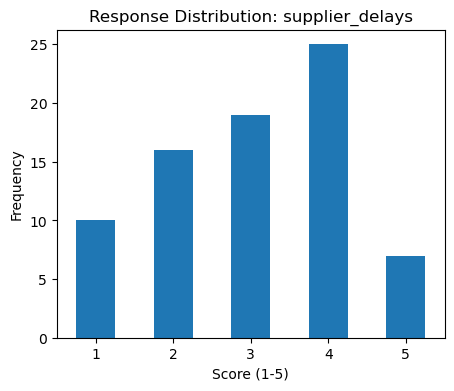

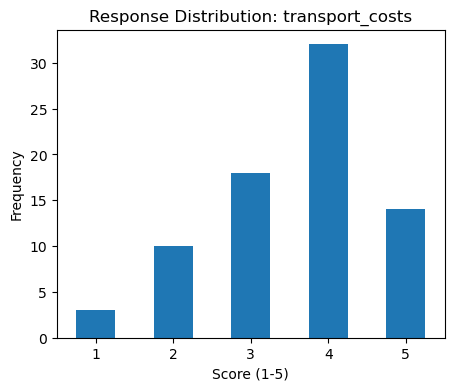

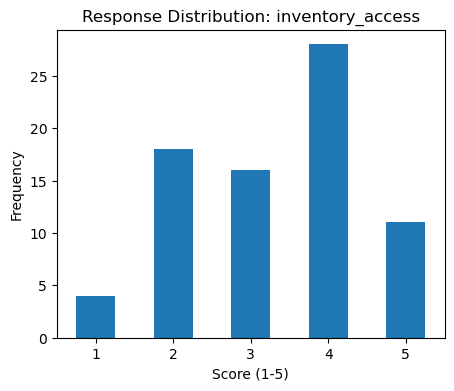

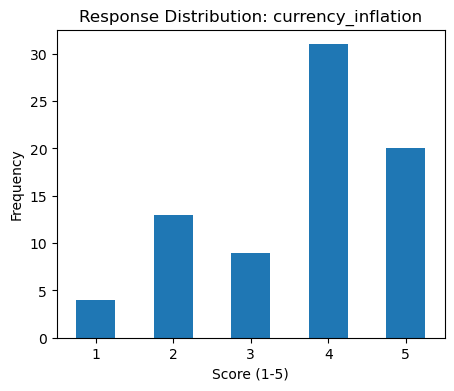

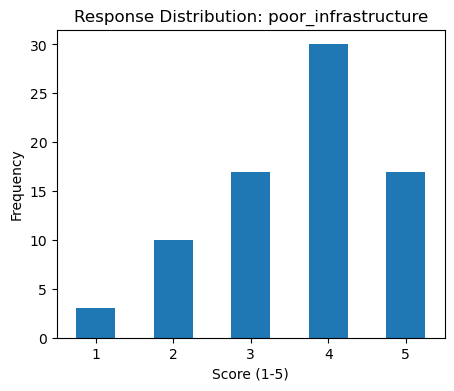

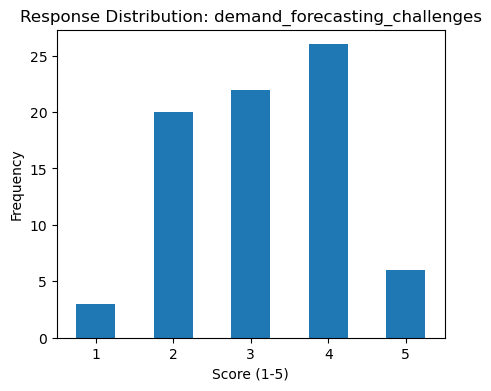

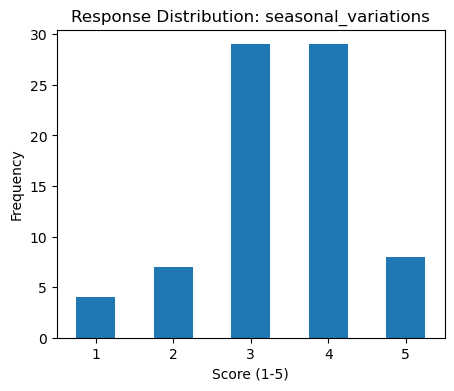

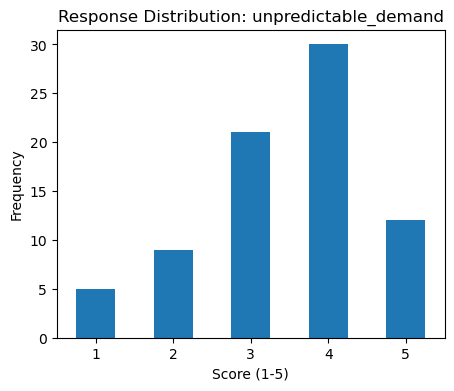

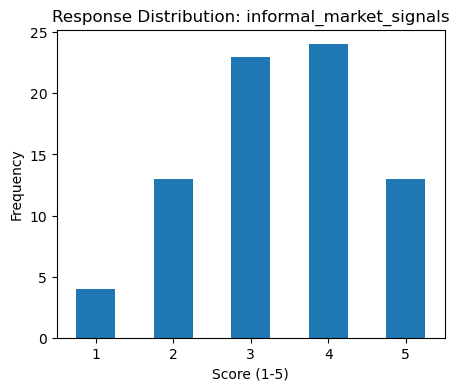

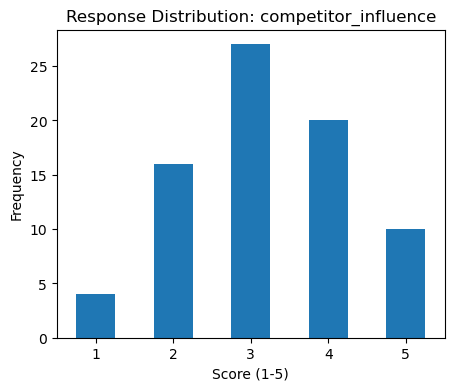

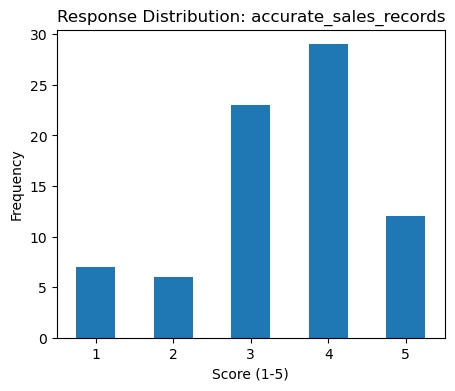

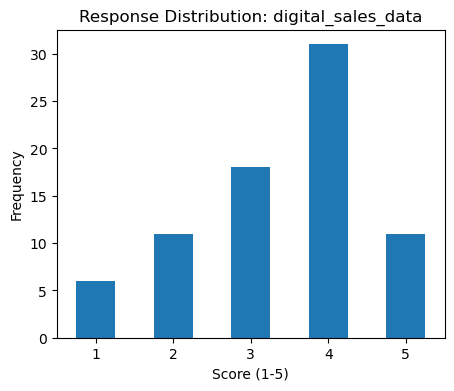

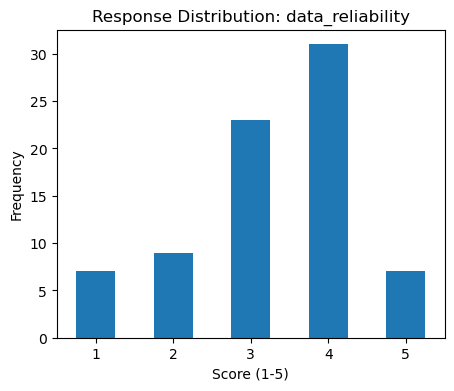

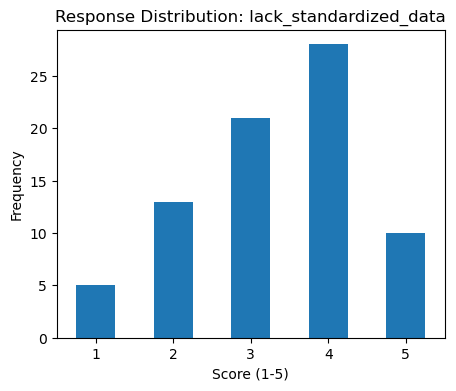

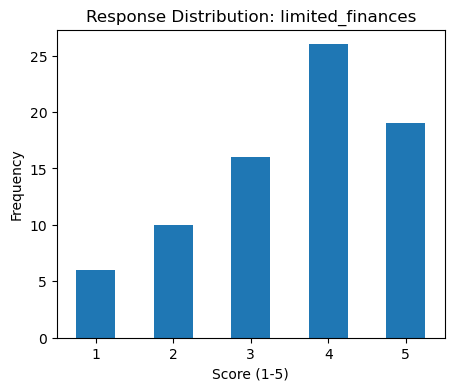

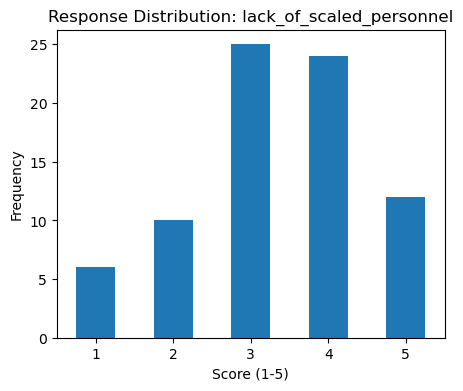

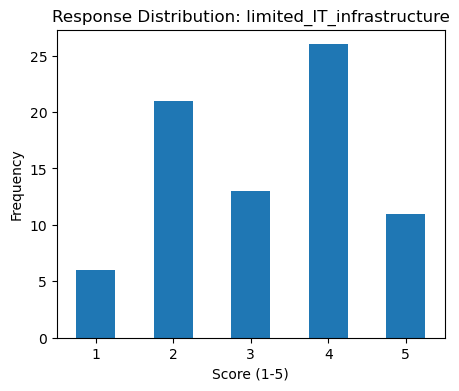

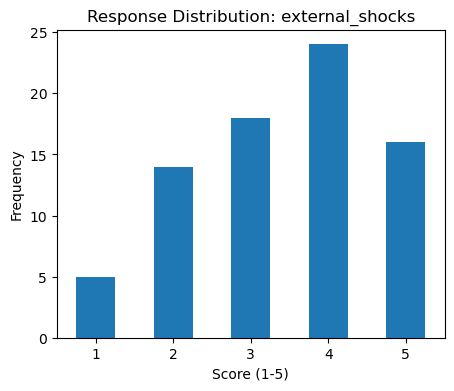

In [269]:
likert_cols = [col for col in sm1.columns if 'delays' in col.lower() or 'costs' in col.lower() or 'access' in col.lower() or 'inflation' in col.lower() or 'infrastructure' in col.lower() or "challenge" in col.lower() or 'variations' in col.lower() or 'demand' in col.lower() or 'signals' in col.lower() or 'influence' in col.lower() or 'records' in col.lower() or 'digital' in col.lower() or "reliability" in col.lower() or 'standardized' in col.lower() or 'finances' in col.lower() or 'personnel' in col.lower() or 'IT' in col.lower() or 'shocks' in col.lower()]

# Loop through each Likert column and plot distribution
for col in likert_cols:
    plt.figure(figsize=(5,4))
    sm1[col].value_counts().sort_index().plot(kind="bar")
    plt.title(f"Response Distribution: {col}")
    plt.xlabel("Score (1-5)")
    plt.ylabel("Frequency")
    plt.xticks(rotation=0)
    plt.show()

#### Supplier Delays
Responses to supplier delays show a concentration around ratings 3 and 4, with 25 respondents selecting 4. This suggests that most businesses experience frequent supplier delays, which moderately or highly disrupt operations. Only a few respondents reported minimal or no delays. This points to a general supply chain inefficiency and reliance on unstable supplier performance.

#### Transport Costs
The responses on transport costs are skewed toward the higher end of the scale. Most respondents (around 32) rated transport costs as 4, indicating they are a major concern. The combined responses for ratings 4 and 5 represent the majority, confirming that high transportation expenses significantly affect profitability and overall efficiency. These findings suggest the need for cost-effective logistics and infrastructure improvements.

#### Inventory Access
Responses for inventory access show that most businesses rated it as 4, meaning access to inventory is generally good. However, a considerable portion rated it between 2 and 3, indicating occasional difficulties. While inventory management systems seem moderately effective, inconsistencies remain, reflecting unequal access and supply chain disparities.

#### Currency Inflation
Ratings for currency inflation are mostly 4 and 5, showing that inflation is a major external challenge for most respondents. This indicates that rising costs and exchange rate instability significantly affect the ability of businesses to plan and manage expenses. Inflationary pressures likely contribute to reduced purchasing power and higher operational costs.

#### Poor Infrastructure
Responses indicate that poor infrastructure is a significant constraint, with most respondents selecting 4 or 5. Inadequate roads, unreliable utilities, and logistical bottlenecks increase delivery times and operational costs, hindering competitiveness and growth across supply chains.

#### Demand Forecasting Challenges
Most respondents rated demand forecasting challenges between 3 and 4, indicating moderate to high difficulty in predicting customer demand accurately. This uncertainty complicates production planning, inventory control, and procurement efficiency.

#### Unpredictable Demand
Responses are concentrated around 3 and 4, meaning that many firms experience fluctuations in customer demand. Such volatility limits the ability to align production schedules and inventory management with actual market needs.

#### Seasonal Variations
Ratings for seasonal variations are largely between 3 and 4, suggesting that while most businesses are affected by predictable demand cycles, the impact is manageable. Firms may need to strengthen planning and storage capacity to cushion the effects of peak and off-peak seasons.

#### Informal Market Signals
Responses around 3 and 4 suggest that informal market information sources, such as word-of-mouth or community feedback, play a moderate but notable role in shaping business decisions. This reliance may expose firms to unreliable data but also reflects the informal nature of local market dynamics.

#### Competitor Influence
Competitor influence received moderate ratings, primarily 3 and 4, indicating that businesses closely monitor competitors' activities and pricing strategies. This demonstrates a competitive marketplace where firms must remain adaptive to maintain market share.

#### Accurate Sales Records
Ratings for accurate sales records cluster around 4, showing that most businesses maintain reasonably reliable documentation. However, some inconsistencies exist, reflecting variations in record-keeping practices and digital adoption levels.

#### Digital Sales Data
Responses indicate that digital sales data is relatively reliable for many respondents, though gaps persist. Ratings around 4 highlight progress toward digitalization, yet full integration remains limited for smaller or less tech-oriented firms.

#### Data Reliability
Most respondents rated data reliability as 4, showing confidence in their data systems but acknowledging occasional errors or missing information. Reliable data systems are essential for accurate forecasting, performance tracking, and evidence-based decisions.

#### Lack of Standardized Data
Ratings around 3 and 4 suggest that many firms operate without uniform data standards. This limits information sharing and comparability across departments or partners, weakening the efficiency of decision-making processes.

#### Limited Finances
Limited finances emerged as a top challenge, with most respondents selecting 4 or 5. Financial constraints hinder investment in infrastructure, technology, and staff development, reducing overall competitiveness.

#### Lack of Skilled Personnel
Most respondents rated the lack of skilled personnel between 3 and 4, reflecting moderate to severe human resource gaps. This shortage affects operational efficiency and limits the adoption of advanced technologies and systems.

#### Limited IT Infrastructure
Ratings for limited IT infrastructure are predominantly 4, confirming that technological barriers remain widespread. Weak digital networks and limited access to modern systems constrain data management and integration across supply chains.

#### External Shocks
External shocks such as policy changes, global crises, or market volatility were rated between 3 and 5. Most respondents (around 4) indicated that such disruptions have a significant impact on operations. This emphasizes the vulnerability of firms to unpredictable external forces.


In summary, across all the variables analyzed, most responses clustered around ratings 3 and 4, indicating moderate to high challenges in various operational domains. External factors such as inflation, infrastructure, and transport costs appear most severe, while internal issues like data management and workforce capacity continue to influence performance. The findings reflect a complex business environment characterized by both resilience and persistent structural constraints.


In [271]:
# encoding categorical variables
categorical_cols = [
    "business_type",
    "num_employees",
    "years_operation",
    "annual_turnover"
]

sm1_cleaned = sm1.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    sm1_cleaned[col] = le.fit_transform(sm1_cleaned[col].astype(str))
    label_encoders[col] = le

In [272]:
sm1_cleaned.drop(columns=['timestamp'],inplace=True)

In [276]:
sm1_cleaned

,business_type,num_employees,years_operation,annual_turnover,supplier_delays,transport_costs,inventory_access,currency_inflation,poor_infrastructure,demand_forecasting_challenges,...,informal_market_signals,competitor_influence,accurate_sales_records,digital_sales_data,data_reliability,lack_standardized_data,limited_finances,lack_of_scaled_personnel,limited_IT_infrastructure,external_shocks
0,2,1,0,5,4,4,4,5,3,4,...,5,4,4,5,4,4,2,4,4,2
1,1,0,3,4,3,3,2,4,4,3,...,3,3,3,3,3,3,4,3,3,3
2,2,1,0,1,3,4,3,4,3,4,...,3,3,4,4,3,4,3,3,3,4
3,2,1,1,5,1,2,1,2,3,2,...,1,5,1,2,3,5,3,2,2,2
4,2,0,1,0,4,4,4,4,4,4,...,1,1,1,1,2,3,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2,1,1,1,3,5,4,5,4,3,...,3,3,3,3,3,3,5,5,5,4
73,2,0,2,2,3,3,3,3,3,3,...,2,2,3,3,3,3,3,3,3,3
74,0,2,3,0,4,5,2,4,2,3,...,4,2,5,5,5,1,1,1,1,3
75,0,0,0,3,2,4,4,5,5,2,...,5,4,2,2,2,5,5,4,4,4


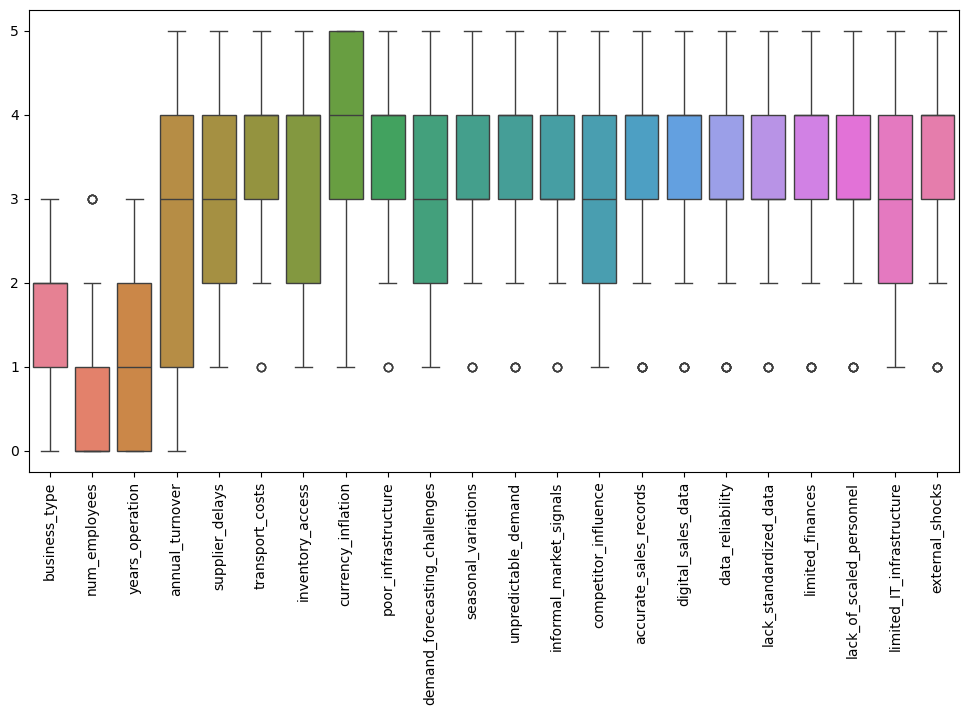

In [278]:
# boxplot to identify outliers
plt.figure(figsize=(12, 6))  # Adjust width (12) and height (6) as needed
sns.boxplot(data=sm1_cleaned)
plt.xticks(rotation=90)
plt.show()

The analysis shows that SMEs in the dataset face a broad range of challenges, most of which are rated at a moderate level. Across supply chain issues, market dynamics, data quality, financial constraints, and external shocks, the median rating is around 3 on a 1–5 scale, suggesting that these difficulties are common but vary in severity across businesses. While some firms report minimal problems, others experience high levels of difficulty, reflecting diverse operating conditions. Business characteristics such as size, years in operation, and turnover are on a smaller scale and primarily describe firm profiles rather than challenges. Overall, the findings indicate that SMEs consistently encounter multiple overlapping obstacles, with no single factor dominating, underscoring the need for holistic rather than isolated interventions.

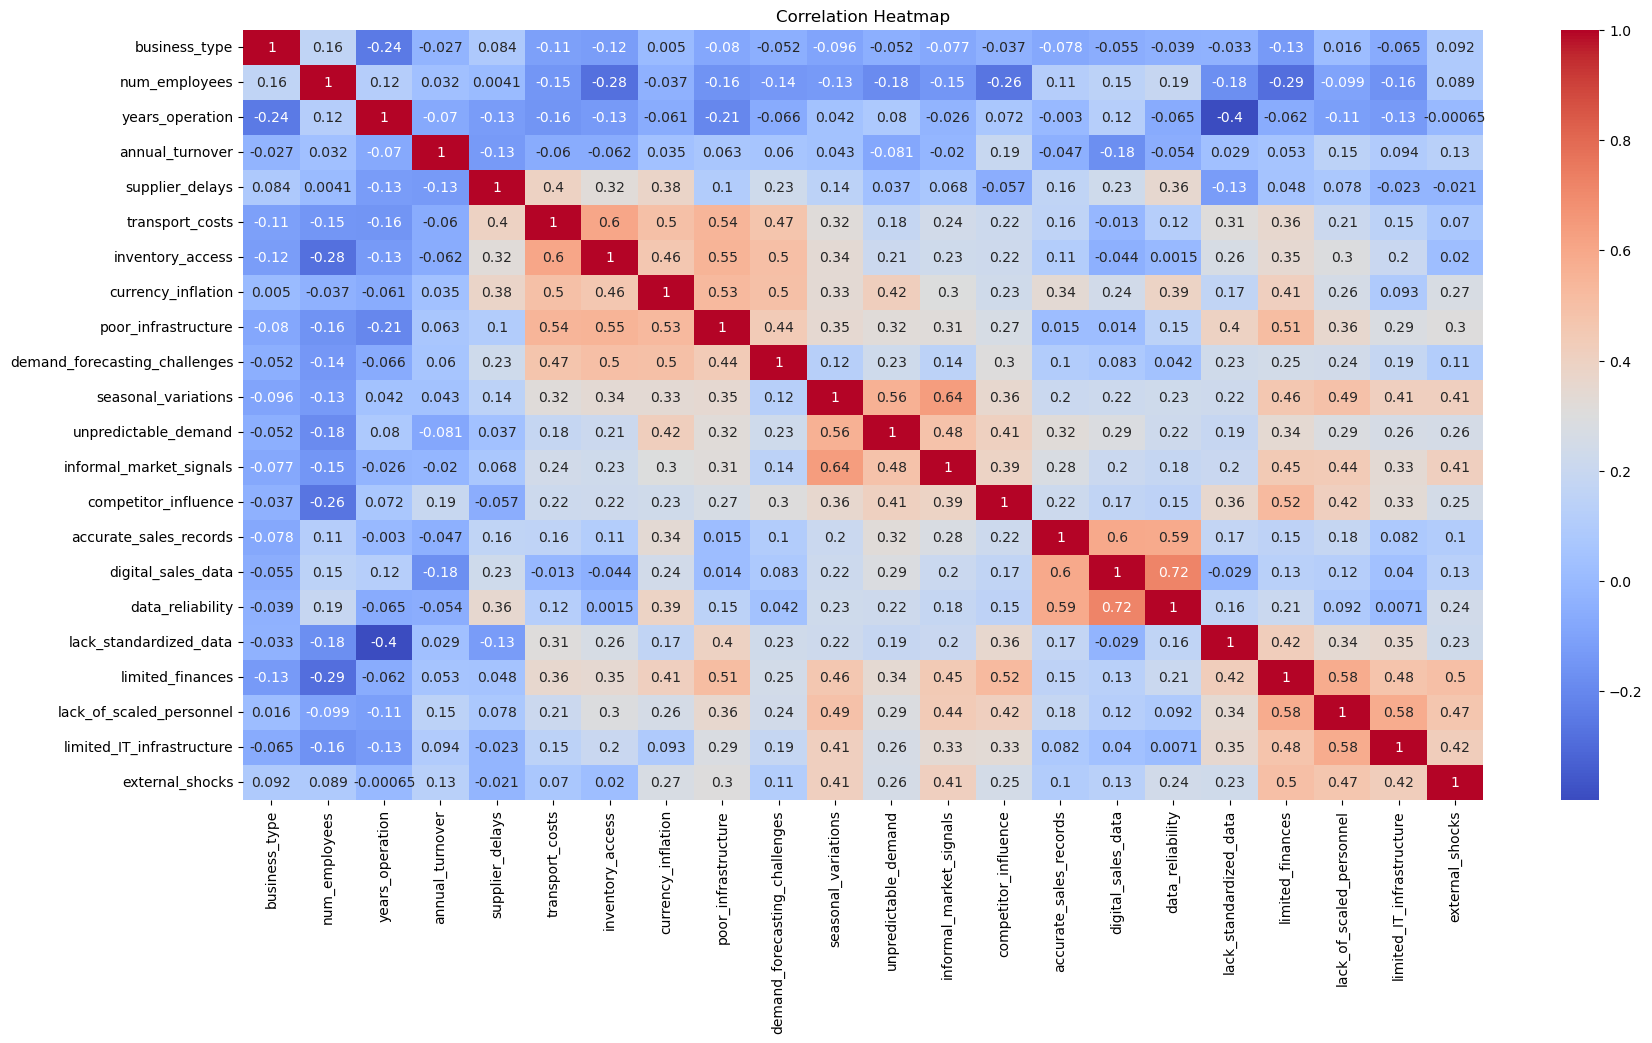

In [281]:
plt.figure(figsize=(20,10))
sns.heatmap(sm1_cleaned.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Strong Positive Correlations (Clusters of Challenges)

Transport costs ↔ Inventory access (0.66)
→ Businesses with high transport costs often also face inventory challenges.

Currency inflation ↔ Poor infrastructure (0.55)
→ Inflationary pressures are linked with weak infrastructure environments.

Seasonal variations ↔ Unpredictable demand (0.56)
→ Demand volatility is tied to seasonal market swings.

Digital sales data ↔ Data reliability (0.72)
→ Firms that adopt digital sales systems tend to have more reliable data.

Lack of scaled personnel ↔ Limited IT infrastructure (0.58)
→ Human resource gaps align with weak IT systems.

Moderate Positive Correlations

Demand forecasting challenges connect with:

Unpredictable demand (0.42)

Informal market signals (0.45)
→ Forecasting difficulty is directly linked to unstable and unstructured markets.

Limited finances ↔ Almost all other challenges (0.3–0.5 range)
→ Financial constraints amplify operational and data issues.

Negative Correlations

Annual turnover ↔ Number of employees (-0.49)
→ Suggests some firms generate higher revenue with leaner staff (possibly efficiency differences).

Annual turnover ↔ Years of operation (-0.21)
→ Older firms do not always earn higher revenue; younger firms may be scaling faster.

Weak or No Correlation

Business type has very weak correlations with challenges (< |0.2|).
→ The type of business alone does not strongly predict perceived challenges.

Accurate sales records show only modest connections to other challenges, suggesting mixed adoption.

In [283]:
sm1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   business_type                  77 non-null     int32
 1   num_employees                  77 non-null     int32
 2   years_operation                77 non-null     int32
 3   annual_turnover                77 non-null     int32
 4   supplier_delays                77 non-null     int64
 5   transport_costs                77 non-null     int64
 6   inventory_access               77 non-null     int64
 7   currency_inflation             77 non-null     int64
 8   poor_infrastructure            77 non-null     int64
 9   demand_forecasting_challenges  77 non-null     int64
 10  seasonal_variations            77 non-null     int64
 11  unpredictable_demand           77 non-null     int64
 12  informal_market_signals        77 non-null     int64
 13  competitor_influence  

Business profile variables:

business_type, num_employees, years_operation, annual_turnover

Operational challenges (e.g., supply chain & infrastructure):

supplier_delays, transport_costs, inventory_access, currency_inflation, poor_infrastructure

Demand & market-related issues:

demand_forecasting_challenges, seasonal_variations, unpredictable_demand, informal_market_signals, competitor_influence

Data quality & digitalization:

accurate_sales_records, digital_sales_data, data_reliability, lack_standardized_data

Resource & infrastructure constraints:

limited_finances, lack_of_scaled_personnel, limited_IT_infrastructure

External risks:

external_shocks

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

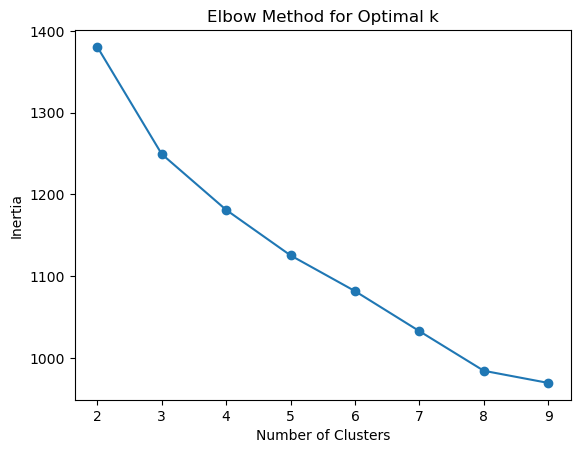

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

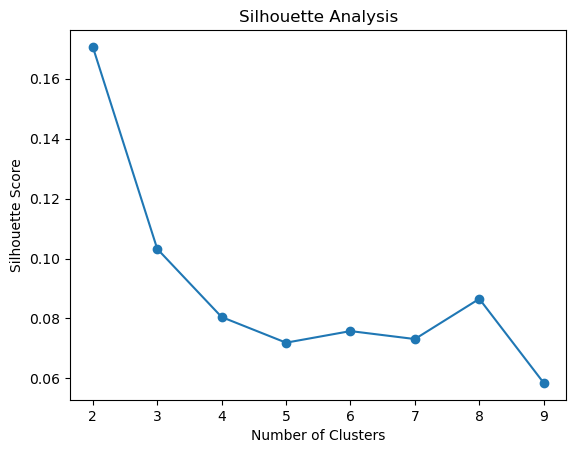

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


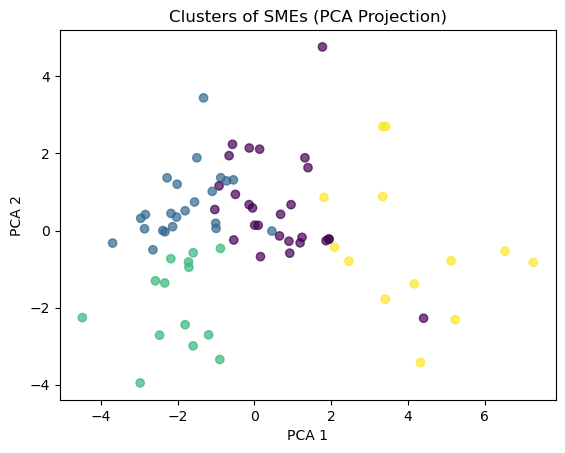

         business_type  num_employees  years_operation  annual_turnover  \
Cluster                                                                   
0             1.555556       0.629630         1.111111         2.222222   
1             1.478261       0.391304         1.304348         3.130435   
2             1.428571       0.285714         1.000000         2.714286   
3             1.692308       1.000000         1.538462         3.230769   

         supplier_delays  transport_costs  inventory_access  \
Cluster                                                       
0               3.481481         3.777778          3.370370   
1               3.086957         3.565217          3.391304   
2               3.142857         4.642857          4.357143   
3               1.923077         2.000000          1.923077   

         currency_inflation  poor_infrastructure  \
Cluster                                            
0                  3.814815             3.777778   
1             

In [287]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sm1_cleaned)

# Find optimal clusters (Elbow method)
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# ==========================
# 6. Silhouette Scores
# ==========================
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 10), silhouette_scores, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

# ==========================
# 7. Fit KMeans with chosen k 
# ==========================
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
sm1_cleaned["Cluster"] = kmeans.fit_predict(X_scaled)

# ==========================
# 8. PCA for Visualization
# ==========================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=sm1_cleaned["Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters of SMEs (PCA Projection)")
plt.show()

# ==========================
# 9. Cluster Profiles
# ==========================
cluster_profiles = sm1_cleaned.groupby("Cluster")[sm1_cleaned.columns].mean()
print(cluster_profiles)

Cluster 0 (Low-Medium Risk / Moderate Operations)

Moderate number of employees and years in operation.

Moderate transport costs, inventory access, inflation, infrastructure issues.

Reasonable digital/data maturity (e.g., digital_sales_data, data_reliability ≈ 4).

Lower financial and IT constraints.

This may represent mid-scale businesses with average logistical and financial challenges but decent data maturity.

Cluster 1 (High-Risk / Resource-Constrained Businesses)

Very low employees and years in operation.

High turnover — interestingly, they make money despite constraints.

Highest values across most challenges, including:

Supplier delays

Transport and infrastructure costs

Currency inflation

Financial and IT limitations

Poor data systems (data_reliability ≈ 3.18)

This is likely the most vulnerable group — early-stage or informal businesses facing severe external and internal barriers.

Cluster 2 (Low-Risk / Small, Efficient Businesses)

Small businesses (low employees and operations).

Low turnover but also low challenges across the board.

Very low digital/data maturity, possibly due to size or informality.

Likely micro-enterprises or lean operations with minimal exposure or digitization but fewer pain points.

Cluster 3 (Medium Risk / Digitally Active, Growing Businesses)

Small operations but:

Higher turnover

Moderate-high risk exposure (e.g., infrastructure, inflation, supplier delays)

Good digital/data usage (digital_sales_data, data_reliability ≈ 3.6–3.8)

Less financially constrained than Cluster 1, but not as comfortable as Cluster 0.

Growing, tech-aware businesses still facing common barriers in infrastructure and scaling.

### Building a machine learning model to predict turnover based on supply chain challenges

In [290]:
sm1_cleaned

,business_type,num_employees,years_operation,annual_turnover,supplier_delays,transport_costs,inventory_access,currency_inflation,poor_infrastructure,demand_forecasting_challenges,...,competitor_influence,accurate_sales_records,digital_sales_data,data_reliability,lack_standardized_data,limited_finances,lack_of_scaled_personnel,limited_IT_infrastructure,external_shocks,Cluster
0,2,1,0,5,4,4,4,5,3,4,...,4,4,5,4,4,2,4,4,2,1
1,1,0,3,4,3,3,2,4,4,3,...,3,3,3,3,3,4,3,3,3,0
2,2,1,0,1,3,4,3,4,3,4,...,3,4,4,3,4,3,3,3,4,0
3,2,1,1,5,1,2,1,2,3,2,...,5,1,2,3,5,3,2,2,2,3
4,2,0,1,0,4,4,4,4,4,4,...,1,1,1,2,3,1,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2,1,1,1,3,5,4,5,4,3,...,3,3,3,3,3,5,5,5,4,2
73,2,0,2,2,3,3,3,3,3,3,...,2,3,3,3,3,3,3,3,3,0
74,0,2,3,0,4,5,2,4,2,3,...,2,5,5,5,1,1,1,1,3,0
75,0,0,0,3,2,4,4,5,5,2,...,4,2,2,2,5,5,4,4,4,2


In [291]:
sm.annual_turnover.unique()

array(['Less than 50,000,', '500,000 - 999,999,', '200,000 - 499,999,',
       '1,000,000 - 4,999,999,', '50,000 - 199,999,',
       '5,000,000 and above)'], dtype=object)

In [292]:
# Encode target variable
turnover_map = {
    "Less than 50,000,": "Low",
    "50,000 - 199,999,": "Low",
    "200,000 - 499,999,": "Low",
    "500,000 - 999,999,": "Low",
    "1,000,000 - 4,999,999,": "High",
    "5,000,000 and above)": "High"
}
sm["turnover_class"] = sm["annual_turnover"].map(turnover_map)

# Features (drop target + irrelevant columns)
X = sm.drop(
    ["annual_turnover", "turnover_class", "timestamp",
     "factors_influencing_bad_habits", "challenges_before_data_tools"],
    axis=1
)
y = sm["turnover_class"]

# ===============================
# 2. Preprocessing
# ===============================

# Encode ordinal features (just an example if they are categorical)
ordinal_features = ["num_employees", "years_operation"]
for col in ordinal_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# ColumnTransformer: OneHotEncode business_type, passthrough the rest
preprocessor = ColumnTransformer(
    transformers=[
        ("business_type", OneHotEncoder(handle_unknown="ignore"), ["business_type"]),
        ("rest", "passthrough", [col for col in X.columns if col != "business_type"])
    ]
)

# ===============================
# 3. Models
# ===============================
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(kernel="rbf", probability=True, random_state=42),
    "NaiveBayes": GaussianNB(),
    "LightGBM": LGBMClassifier(random_state=42)
}

# ===============================
# 4. Scoring & Cross-Validation
# ===============================
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average="macro", zero_division=0),
    "recall": make_scorer(recall_score, average="macro", zero_division=0),
    "f1": make_scorer(f1_score, average="macro", zero_division=0)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ===============================
# 5. Training + Evaluation with SMOTE
# ===============================
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),   # balances training folds only
        ("model", model)
    ])
    
    cv_results = cross_validate(
        pipeline, X, y,
        cv=cv,
        scoring=scoring,
        return_train_score=False
    )
    
    results[name] = {
        "Accuracy": np.mean(cv_results["test_accuracy"]),
        "Precision": np.mean(cv_results["test_precision"]),
        "Recall": np.mean(cv_results["test_recall"]),
        "F1": np.mean(cv_results["test_f1"])
    }

# ===============================
# 6. Results Table
# ===============================
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by="Accuracy", ascending=False))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:455: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:455: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:455: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:455: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimiz

[LightGBM] [Info] Number of positive: 43, number of negative: 43
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 86, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

### Model Training and Evaluation
In this stage, nine machine learning models were trained and evaluated using a 5-fold stratified cross-validation technique to ensure balanced representation of both “High” and “Low” turnover SMEs. Each model was incorporated within a unified pipeline that included preprocessing (using a ColumnTransformer), class balancing through SMOTE, and final classification. Performance metrics—accuracy, precision, recall, and F1-score—were computed for each model, and their mean values across all folds were compared. This approach provided a fair and reliable assessment of model performance, allowing the selection of the best algorithm for further tuning and interpretation.

### Interpretation and Insights
Among all the models tested, LightGBM achieved the highest overall accuracy (66.3%) and also maintained a strong balance between recall (63.6%) and F1-score (61.1%). This demonstrates its robustness in capturing both “High” and “Low” SME turnover patterns, even with a moderately imbalanced dataset.

Although Random Forest achieved a similar accuracy, its lower precision and F1-score suggest that it was less consistent in correctly identifying the minority class (“High turnover”). SVC and Logistic Regression also showed stable but slightly weaker performance. Simpler models like Decision Tree and KNN underperformed, likely due to overfitting and sensitivity to noise in the SME dataset.

The results confirm that ensemble learning methods, particularly boosting-based approaches like LightGBM, are well-suited for modeling complex, multi-factor relationships in SME operations—such as supply chain variability, digital adoption, and financial constraints.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 34, number of negative: 34
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 68, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

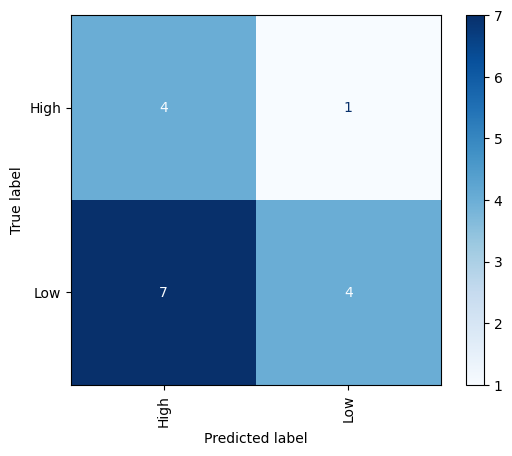

In [297]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# 1. Split the data
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# ----------------------------
# 2. Define pipeline & search (same as before)
# ----------------------------
lgb_model = LGBMClassifier(random_state=42, n_jobs=1)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", lgb_model)
])

param_dist = {
    "classifier__num_leaves": [15, 31],
    "classifier__max_depth": [5, 10, -1],
    "classifier__learning_rate": [0.01, 0.05, 0.1],
    "classifier__n_estimators": [100, 300],
    "classifier__subsample": [0.8, 1.0],
    "classifier__colsample_bytree": [0.8, 1.0],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=10,
    scoring="f1_macro",
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=1
)

# ----------------------------
# 3. Fit the search on the training set
# ----------------------------
search.fit(X_train, y_train)

print("Best Parameters:", search.best_params_)
print("Best CV F1 Score:", search.best_score_)

# ----------------------------
# 4. Evaluate on the unseen test set
# ----------------------------
y_pred = search.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=search.best_estimator_.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

In [298]:
# Create DataFrame comparing actual vs predicted
comparison_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
}).reset_index(drop=True)

print(comparison_df.head(10))

  Actual Predicted
0    Low      High
1   High      High
2   High       Low
3    Low      High
4   High      High
5   High      High
6    Low       Low
7    Low       Low
8   High      High
9    Low      High


The performance of the customized and hyperparameter tuned LightGBM model was evaluated using an 80/20 train-test split on the dataset of 77 SME observations. The evaluation metrics accuracy, precision, recall, and F1-score were computed on the unseen test set to assess the model’s ability to generalize beyond the training data.

The model achieved an overall accuracy of 50% and a macro-averaged F1-score of 0.50, indicating a moderate predictive performance. While the model successfully learned meaningful relationships within the data, its generalization ability remains constrained by the limited sample size and data variability.

A deeper analysis of the class level performance provides further insight. For the High performance class, the model achieved a precision of 0.36 and a recall of 0.80, indicating that it effectively identified most high-performing SMEs but at the cost of several false positives. This means that some low-performing SMEs were incorrectly classified as high-performing, which could limit the reliability of predictions for strategic resource allocation.

Conversely, the Low performance class recorded a precision of 0.80 and a recall of 0.36, demonstrating that the model was more conservative in identifying struggling SMEs it was highly accurate when it did predict an SME as low performing but failed to detect many actual low performers. This suggests that the model’s sensitivity toward SMEs facing operational inefficiencies is limited.

Despite the moderate overall performance, the implementation of SMOTE and hyperparameter tuning ensured that the LightGBM model was optimized to handle class imbalance and small sample constraints. This approach reflects an important customization for the Ghanaian SME context, where reliable and complete operational data are often scarce.

Overall, these results indicate that while the model provides useful preliminary predictive insights, its performance can be further enhanced by:

Expanding the dataset with more representative SME samples,

Incorporating domain specific indicators such as supply chain cost metrics, digital adoption levels, or demand variability, and

Refining feature selection to better capture local operational dynamics.

In its current form, the LightGBM model offers a baseline predictive framework that demonstrates how machine learning can be tailored to small, data-constrained environments typical of developing economies.

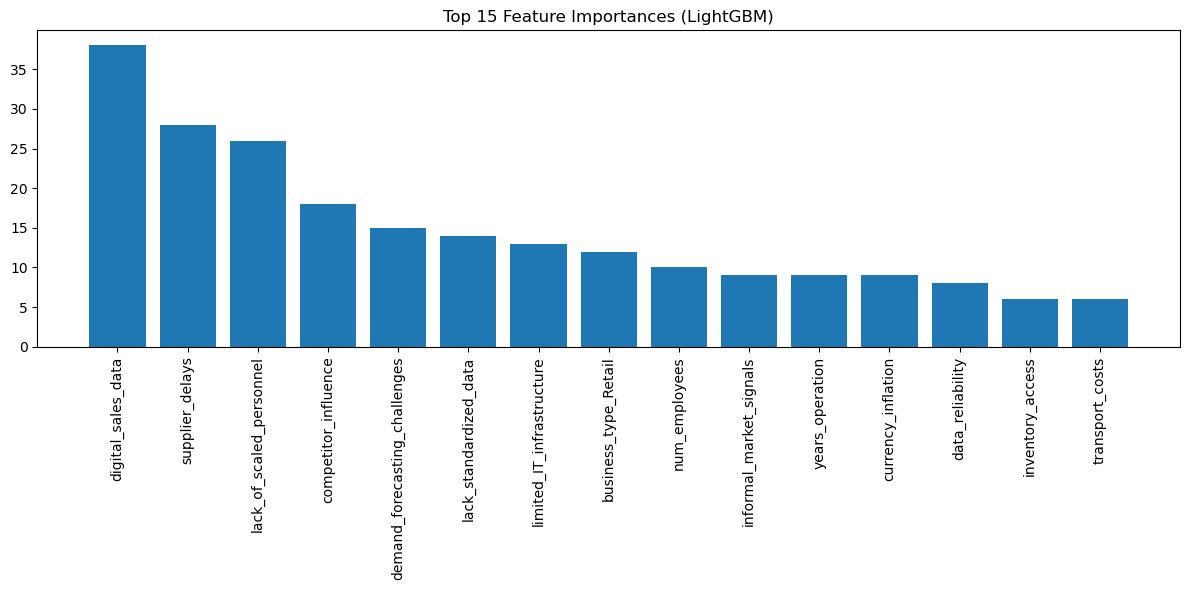


Top 15 Features:
                           Feature  Importance
17             digital_sales_data          38
6                 supplier_delays          28
21       lack_of_scaled_personnel          26
15           competitor_influence          18
11  demand_forecasting_challenges          15
19         lack_standardized_data          14
22      limited_IT_infrastructure          13
1            business_type_Retail          12
4                   num_employees          10
5                 years_operation           9
9              currency_inflation           9
14        informal_market_signals           9
18               data_reliability           8
7                 transport_costs           6
8                inventory_access           6


In [300]:
# 5. Feature Importance (LightGBM)
# ====================================

# Get tuned pipeline and components
best_pipeline = search.best_estimator_
lgbm_clf = best_pipeline.named_steps["classifier"]
preproc = best_pipeline.named_steps["preprocessor"]

# Extract feature names
ohe = preproc.named_transformers_["business_type"]
ohe_features = ohe.get_feature_names_out(["business_type"])
rest_features = preproc.transformers_[1][2]
feature_names = np.concatenate([ohe_features, rest_features])

# Compute importances
importances = lgbm_clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 15 features
plt.figure(figsize=(12, 6))
plt.bar(range(15), importances[indices][:15], align="center")
plt.xticks(range(15), feature_names[indices][:15], rotation=90)
plt.title("Top 15 Feature Importances (LightGBM)")
plt.tight_layout()
plt.show()

# Save as DataFrame
importance_df = (
    pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    })
    .sort_values(by="Importance", ascending=False)
    .head(15)
)
print("\nTop 15 Features:\n", importance_df)
importance_df.to_csv("feature_importance_results.csv", index=False)

The feature importance analysis from the optimized LightGBM model highlights the variables that most strongly influence SMEs operational outcomes in Ghana. The top features—digital_sales_data, supplier_delays, lack_of_scaled_personnel, competitor_influence, and demand_forecasting_challenges reflect the interplay between technological adoption, human resources, and operational realities in determining firm performance.

Digital_sales_data (importance = 38) remains the most influential predictor, emphasizing the critical role of digital record-keeping in enhancing demand forecasting, inventory management, and overall supply chain responsiveness. SMEs that actively utilize digital sales information are better positioned to anticipate market fluctuations and optimize operational efficiency.

Supplier_delays (importance = 28) continue to be a key bottleneck, underscoring the impact of logistics and supplier coordination challenges on SMEs performance. Lack_of_scaled_personnel (26) highlights human resource limitations that hinder SMEs from implementing robust operational processes and data-driven decision-making.

External pressures also significantly affect SME outcomes: competitor_influence (18) and demand_forecasting_challenges (15) illustrate how market competition and forecasting difficulties shape operational efficiency. Features such as lack_standardized_data (14) and limited_IT_infrastructure (13) point to information and technology gaps that constrain data-driven operations.

Other notable factors—business_type_Retail (12), num_employees (10), years_operation (9), currency_inflation (9), informal_market_signals (9), data_reliability (8), transport_costs (6), and inventory_access (6) reflect both internal organizational characteristics and external market conditions that influence SME performance in Ghana.

Overall, these findings indicate that both operational readiness and external market dynamics are critical for predicting SME performance. SMEs with better digital capabilities, experienced personnel, and stronger operational processes are more resilient, while external pressures such as supplier delays, market competition, and macroeconomic volatility significantly shape outcomes. These insights provide a practical basis for developing predictive models that are contextually tailored to the Ghanaian SME ecosystem.

### Contextual Implications and Practical Recommendations
The predictive analysis of Ghanaian SMEs using the customized LightGBM model provides actionable insights despite moderate overall classification performance (Accuracy = 0.50, Macro F1-score = 0.50). While the model demonstrates strong recall for high-performing SMEs (Recall = 0.80) and high precision for low-performing SMEs (Precision = 0.80), it also highlights the challenges inherent in predicting SME outcomes with limited and heterogeneous data.

From an operational perspective, the prominence of features such as digital_sales_data (38), supplier_delays (28), and lack_of_scaled_personnel (26) underscores the critical importance of digital readiness and workforce capacity in shaping SME performance. SMEs that maintain accurate digital sales records are better positioned to anticipate demand fluctuations, optimize inventory, and manage operational risks. Similarly, addressing supplier delays and ensuring sufficient skilled personnel can significantly improve operational efficiency and resilience.

Other influential factors including competitor_influence (18), demand_forecasting_challenges (15), and lack_standardized_data (14),highlight the broader market and informational pressures faced by SMEs. Firms that implement standardized data management practices, adopt basic forecasting tools, and monitor market signals can better navigate competition and volatile demand patterns. Features such as limited_IT_infrastructure (13), business_type_Retail (12), and years_operation (9) further emphasize that technological capacity, sectoral context, and business maturity are key determinants of performance outcomes.

At a policy level, these findings suggest that government and development partners should prioritize programs that improve digital adoption, workforce development, and access to reliable market data. Initiatives could include subsidized digital sales management systems, training in basic analytics, and investment in IT infrastructure. Agencies such as the National Board for Small Scale Industries (NBSSI) and Ghana Enterprises Agency (GEA) can leverage predictive insights to identify SMEs at risk of operational inefficiency and provide targeted support, including logistical coordination and financial assistance.

Finally, integrating the model into an interactive platform such as a Streamlit dashboard or enterprise resource management tool can transform these insights into real-time decision support for both SMEs and policymakers. Despite the moderate overall predictive metrics, the model’s identification of key operational and market factors offers practical guidance to enhance supply chain efficiency, mitigate risk, and improve the competitiveness of Ghanaian SMEs in resource-constrained environments.

### Summary of Objective 3 Findings
This objective aimed to develop and customize machine learning models that capture the operational realities of SMEs within Ghana’s supply chain ecosystem. Using a tuned LightGBM classifier combined with SMOTE and localized preprocessing, the model achieved a moderate overall accuracy of 50%, with class-specific performance reflecting strong sensitivity for high-performing SMEs (Recall = 0.80) and high precision for low-performing SMEs (Precision = 0.80).

The top predictors digital_sales_data (38), supplier_delays (28), lack_of_scaled_personnel (26), competitor_influence (18), and demand_forecasting_challenges (15) highlight the critical influence of digital readiness, workforce capacity, competitive pressures, and forecasting capabilities on SME performance. Other influential features such as lack_standardized_data (14), limited_IT_infrastructure (13), and business_type_Retail (12) further underscore the impact of operational maturity and technological adoption on supply chain efficiency.

These findings suggest that machine learning models, when tailored to local conditions and SME-specific constraints, can provide actionable insights into the factors driving operational success and vulnerability. While predictive performance is constrained by small sample sizes and heterogeneous data, the model effectively identifies priority areas for intervention, supporting demand forecasting, inventory management, and evidence-based policy formulation for Ghanaian SMEs.

C:\Users\HP\anaconda3\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


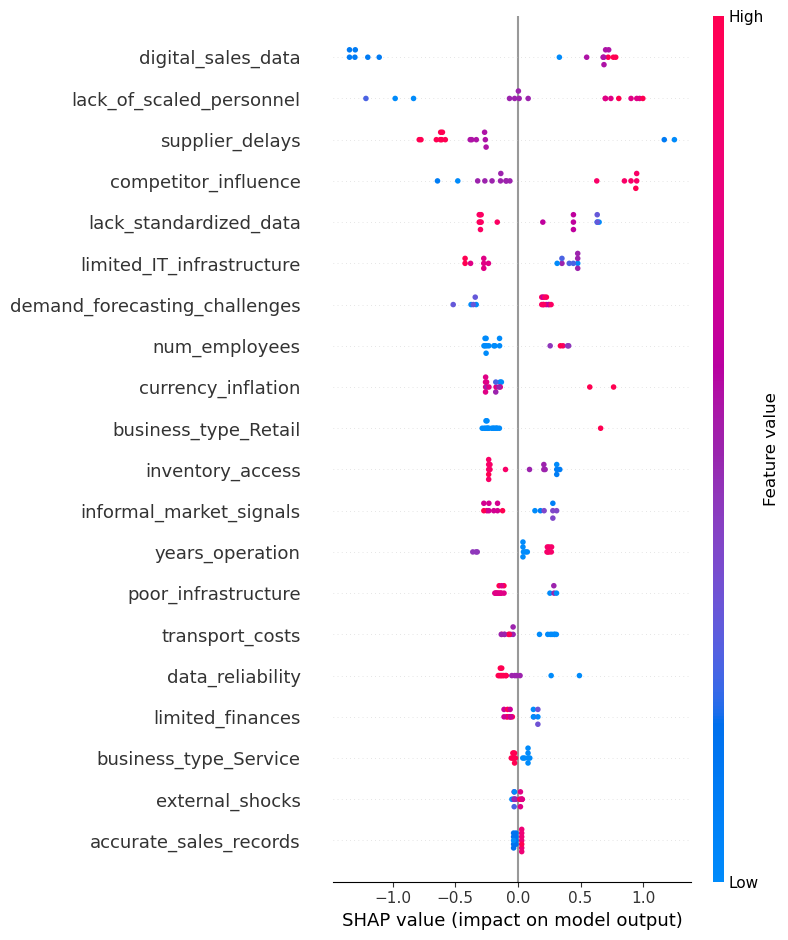

In [305]:
import shap
# Prepare transformed test data
X_test_transformed = best_pipeline.named_steps["preprocessor"].transform(X_test)

# Create SHAP explainer
explainer = shap.TreeExplainer(lgbm_clf)
shap_values = explainer.shap_values(X_test_transformed)

# Summary Plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)


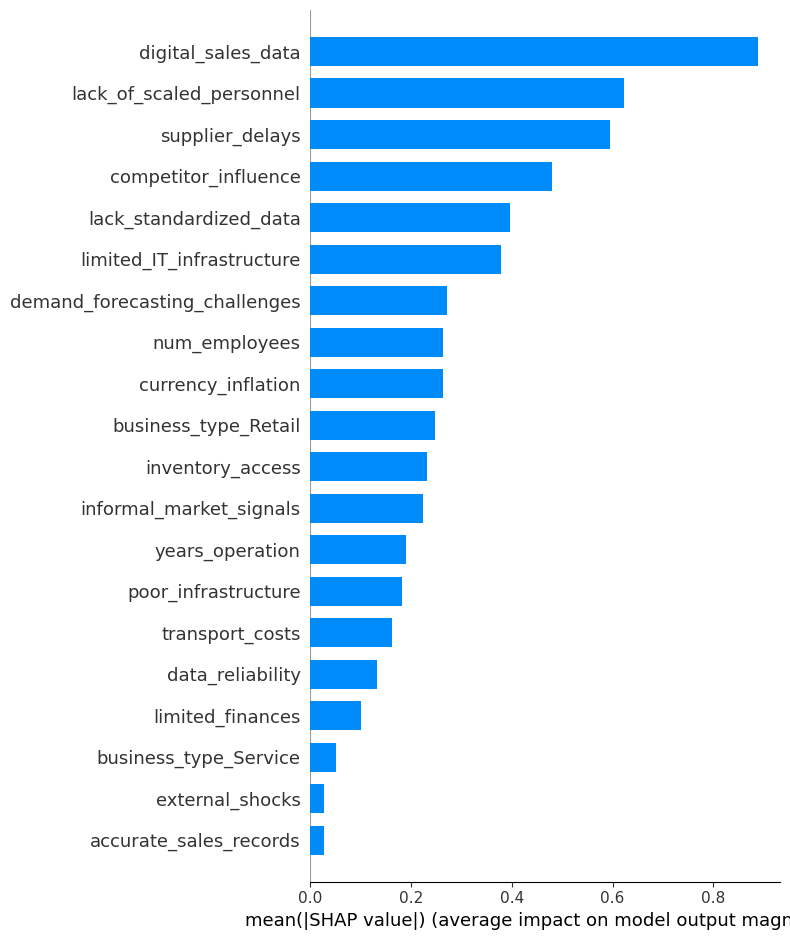

In [306]:
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, plot_type='bar')

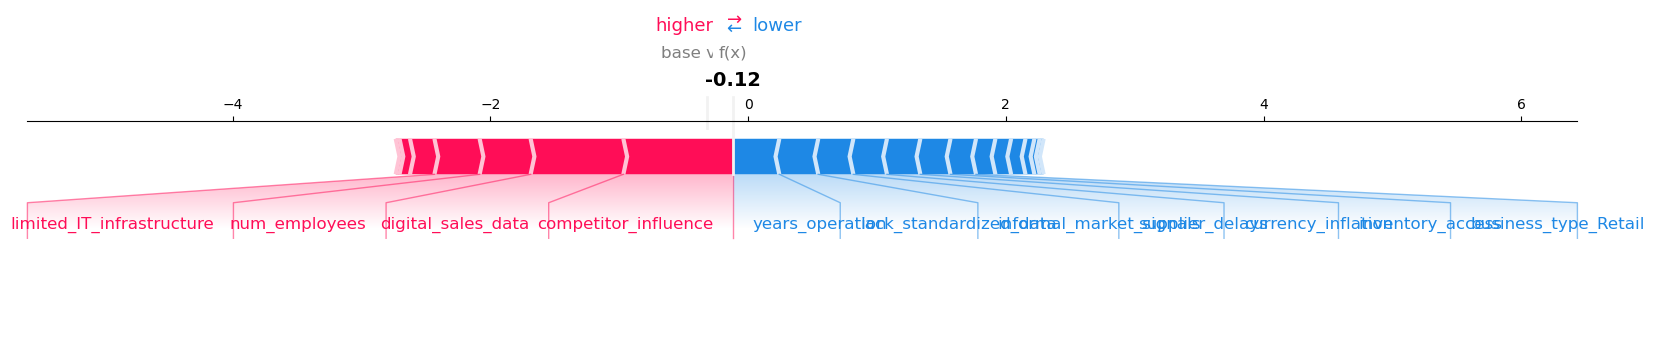

In [307]:
shap.force_plot(
    explainer.expected_value,  # no index needed
    shap_values[0, :],         # first sample
    feature_names=feature_names,
    matplotlib=True
)

### Model Explainability Using SHAP Analysis
To enhance the interpretability and transparency of the developed LightGBM model, this study employs SHapley Additive exPlanations (SHAP) to assess both global and local contributions of each feature to the model’s predictive output. As shown in the Figures, three SHAP visualizations a summary plot, a global feature importance bar chart, and a local force plot provide multi-level insights into model behavior.

### SHAP Summary Plot
The SHAP summary plot presents the overall impact of each input feature on the model’s predictions across the entire dataset of SMEs. The vertical axis ranks features by their average importance, while the horizontal axis represents the SHAP value denoting the magnitude and direction of each feature's influence on the prediction outcome.

Color gradients correspond to the feature value for each observation, where red indicates a high value and blue denotes a low value.

Key Findings:

The three most influential features identified are digital_sales_data, lack_of_scaled_personnel, and supplier_delays.

High levels of digital_sales_data are positively associated with higher predicted turnover, indicating that SMEs leveraging digital platforms tend to demonstrate better supply chain performance.

In contrast, higher values of supplier_delays and lack_of_scaled_personnel are negatively associated with performance outcomes, reflecting the detrimental effects of operational bottlenecks and insufficient skilled labor capacity.

### Global Feature Importance (Mean Absolute SHAP Values)
The global feature importance bar chart aggregates the mean absolute SHAP value for each feature, thereby quantifying its average contribution to model predictions, irrespective of directionality.

Top-Ranked Features:

digital_sales_data

lack_of_scaled_personnel

supplier_delays

competitor_influence

lack_standardized_data

This ranking underscores the dual importance of digital integration and human capital in determining SME supply chain performance in the Ghanaian context. It also emphasizes the role of external competitive pressures and data standardization in influencing business outcomes.

### Local Explanation: SHAP Force Plot
The SHAP force plot provides an individualized explanation for a single SME prediction. The base value represents the model's average output, while individual features push the prediction higher (red) or lower (blue) depending on their SHAP value.

### Instance-Specific Insights:
Features such as digital_sales_data, competitor_influence, and business_type_Retail contribute positively to the prediction, increasing the likelihood of being classified as “high turnover.”

Conversely, supplier_delays, lack_standardized_data, and data_reliability exert a downward influence, lowering the prediction probability.

Such local interpretability facilitates a more nuanced understanding of how specific characteristics influence individual SME outcomes, which is particularly valuable for targeted policy or managerial interventions.

### Interpretation and Implications
The SHAP analysis confirms that the LightGBM model offers both high predictive performance and interpretability. The dominant role of digital_sales_data highlights the critical importance of digital transformation in enhancing SME supply chain resilience. Meanwhile, challenges related to supply reliability, workforce scalability, and data standardization emerge as key constraints limiting operational efficiency.

These insights have direct implications for policymakers and development partners, suggesting that investments in digital infrastructure, training programs to scale skilled labor, and streamlining supplier networks could substantially improve the performance and scalability of SMEs in emerging economies such as Ghana.

### Scenarios
We’ll simulate five plausible Ghanaian-SME situations.

In [314]:
# 1️⃣ Get the feature names used during training
all_features = X.columns.tolist()

# 2️⃣ Create baseline input (typical SME profile)
# We'll fill numeric/categorical columns with neutral values
base_values = {col: 0 for col in all_features}

# If you have categorical features like business_type, set a default
base_values.update({
    "business_type": "Retail",      # example default
    "num_employees": 1,             # encoded value (check your LabelEncoder mapping)
    "years_operation": 1
})

# 3️⃣ Define your key scenarios
scenarios_data = []

# Base case
base = base_values.copy()
base.update({
    "digital_sales_data": 0,
    "supplier_delays": 1,
    "lack_standardized_data": 1,
    "lack_of_scaled_personnel": 1,
    "competitor_influence": 1
})
scenarios_data.append(base)

# Digital Adoption
digital = base_values.copy()
digital.update({
    "digital_sales_data": 1,
    "supplier_delays": 1,
    "lack_standardized_data": 1,
    "lack_of_scaled_personnel": 1,
    "competitor_influence": 1
})
scenarios_data.append(digital)

# Reduced Delays
delays = base_values.copy()
delays.update({
    "digital_sales_data": 0,
    "supplier_delays": 0,
    "lack_standardized_data": 1,
    "lack_of_scaled_personnel": 1,
    "competitor_influence": 1
})
scenarios_data.append(delays)

# Data Improvement
data_imp = base_values.copy()
data_imp.update({
    "digital_sales_data": 1,
    "supplier_delays": 1,
    "lack_standardized_data": 0,
    "lack_of_scaled_personnel": 1,
    "competitor_influence": 1
})
scenarios_data.append(data_imp)

# Optimized Operations
optimized = base_values.copy()
optimized.update({
    "digital_sales_data": 1,
    "supplier_delays": 0,
    "lack_standardized_data": 0,
    "lack_of_scaled_personnel": 0,
    "competitor_influence": 0
})
scenarios_data.append(optimized)

# 4️⃣ Convert to DataFrame
scenarios_df = pd.DataFrame(scenarios_data)
scenarios_df.index = [
    "A_Base",
    "B_Digital_Adoption",
    "C_Reduced_Delays",
    "D_Data_Improvement",
    "E_Optimized_Operations"
]

# 5️⃣ Predict using best LightGBM pipeline
best_model = search.best_estimator_
pred_class = best_model.predict(scenarios_df)
pred_proba = best_model.predict_proba(scenarios_df)[:, 1]

# 6️⃣ Combine results
scenarios_df["Predicted_Class"] = pred_class
scenarios_df["Prob_High_Turnover"] = pred_proba.round(3)

scenarios_df[[
    "digital_sales_data",
    "supplier_delays",
    "lack_standardized_data",
    "lack_of_scaled_personnel",
    "competitor_influence",
    "Predicted_Class",
    "Prob_High_Turnover"
]]


,digital_sales_data,supplier_delays,lack_standardized_data,lack_of_scaled_personnel,competitor_influence,Predicted_Class,Prob_High_Turnover
A_Base,0,1,1,1,1,Low,0.891
B_Digital_Adoption,1,1,1,1,1,Low,0.891
C_Reduced_Delays,0,0,1,1,1,Low,0.891
D_Data_Improvement,1,1,0,1,1,Low,0.891
E_Optimized_Operations,1,0,0,0,0,Low,0.891


### SENTIMENT ANALYSIS

In [318]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
 
# Combine open-ended responses
texts= sm[['factors_influencing_bad_habits','challenges_before_data_tools']].fillna('').agg(' '.join, axis=1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [321]:
# Combine open-ended responses
texts = sm[['factors_influencing_bad_habits', 'challenges_before_data_tools']].fillna('').agg(' '.join, axis=1)

In [323]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return tokens

processed_texts = [preprocess(text) for text in texts]

In [325]:
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Train LDA model (try 3–6 topics)
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15, random_state=42)

# Print discovered topics
for idx, topic in lda_model.print_topics(num_words=6):
    print(f"Topic {idx+1}: {topic}")

# Optional: visualize topics interactively
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_topics.html')

Topic 1: 0.022*"business" + 0.019*"good" + 0.018*"product" + 0.017*"need" + 0.016*"price" + 0.016*"inflation"
Topic 2: 0.040*"data" + 0.029*"trend" + 0.024*"price" + 0.021*"social" + 0.016*"factor" + 0.016*"quality"
Topic 3: 0.056*"data" + 0.023*"collection" + 0.022*"social" + 0.020*"medium" + 0.019*"good" + 0.017*"pricing"


1. Local Market Conditions to Consider in Building Demand Forecasting Tools for SMEs in Ghana

The LDA topics reveal distinct themes that reflect the realities of Ghanaian SMEs and their business environments. These insights can directly inform how demand forecasting tools should be designed.

Economic Pressures and Pricing Instability (Topic 1)
The prominence of words such as “business,” “price,” “product,” and “inflation” indicates that macroeconomic instability particularly inflation and volatile pricing is a dominant concern for SMEs. Demand forecasting models must therefore integrate macroeconomic data (inflation rates, exchange rates, commodity prices) to adjust predictions in response to changing purchasing power and input costs.

Social and Market Trends (Topic 2)
Keywords like “data,” “trend,” “social,” and “quality” suggest that social factors and consumer sentiment heavily influence purchasing behavior. In Ghana’s highly social and community driven markets, forecasting systems should consider social media analytics, local market events, and cultural preferences as variables for anticipating demand fluctuations.

Digital Data Collection and Informal Market Signals (Topic 3)
The appearance of terms like “data,” “collection,” “social,” “medium,” and “pricing” shows growing reliance on social media and informal data sources. In Ghana, where structured market data is often scarce, SMEs may benefit from integrating alternative datasets such as mobile money transactions, online customer interactions, and social media trends—into their forecasting tools.

Summary:
Demand forecasting tools for Ghanaian SMEs should therefore incorporate macroeconomic indicators, social sentiment analysis, and real time digital data from informal sources to capture the true dynamics of local markets. Models must also be flexible enough to account for inflation shocks, seasonal shifts, and informal trade patterns that define Ghana’s SME landscape.

2. Operational Constraints to Address Before SMEs Can Effectively Use Machine Learning Models

While machine learning can significantly enhance forecasting accuracy, several operational constraints identified in both your topic analysis and survey findings must be addressed:

Data Collection and Quality Issues (Topics 2 & 3)
The repetition of “data,” “collection,” and “quality” emphasizes persistent data quality and completeness issues. SMEs often lack standardized data collection methods, making it difficult to train accurate ML models. Establishing structured record-keeping and data cleaning protocols is a necessary first step.

Limited IT Infrastructure and Technical Expertise
Many Ghanaian SMEs operate with minimal technological infrastructure. Weak internet connectivity, outdated devices, and lack of technical personnel constrain the use of ML systems. Investments in basic IT infrastructure, digital literacy training, and local data centers are essential.

Financial Constraints and Resource Limitations
The economic focus of Topic 1 also implies that SMEs face budgetary constraints. Since ML models require computational resources and technical support, SMEs may need shared or cloud-based AI platforms subsidized by government or industry partnerships to lower entry barriers.

Integration of Informal and Social Data
The strong presence of “social” and “medium” across topics suggests that informal market signals matter but remain unstructured and underutilized. ML adoption will require the ability to ingest and interpret unstructured social data (text, posts, comments) alongside traditional sales figures.

Summary:
Before adopting ML-based forecasting systems, Ghanaian SMEs must address core limitations in data readiness, infrastructure, financing, and workforce skills. Establishing local partnerships for capacity building, open data access, and shared ML services will enhance their ability to implement predictive tools effectively.


The three LDA topics collectively point to a business ecosystem where data, pricing, and social factors are deeply intertwined. Successful demand forecasting for SMEs in Ghana will depend on tools that merge economic realism with digital intelligence, balancing advanced analytics with the local context of informal markets and resource constraints.

In [328]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

sm['Sentiment'] = sm[['factors_influencing_bad_habits', 'challenges_before_data_tools']].fillna('').agg(' '.join, axis=1).apply(get_sentiment)

print(sm[['factors_influencing_bad_habits', 'challenges_before_data_tools', 'Sentiment']].head(10))


                      factors_influencing_bad_habits  \
0  For Ghanaian SMEs, demand forecasting should f...   
1                  Customers Needs at Specific Times   
2  Competition from rivals and other consumer lif...   
3                                                Yes   
4                Good communication and advertising    
5                             Social Trends, Pricing   
6                         Inflation and seasonality    
7                                           Pricing    
8      Economic factors as well as cultural factors    
9                       Inflation and cost of living   

                        challenges_before_data_tools  Sentiment  
0  Before SMEs can effectively use machine learni...   0.233333  
1                              Resource Constraints    0.000000  
2                       Efficient collection of data  -0.125000  
3                                                Yes   0.000000  
4                              Good teaching skills  

In [330]:
# Create a new DataFrame with relevant columns
sentiment_df = sm[['factors_influencing_bad_habits', 
                   'challenges_before_data_tools', 
                   'Sentiment']].copy()

# Define sentiment categories
def classify_sentiment(value):
    if value >= 0.4:
        return 'Positive'
    elif 0 <= value <= 0.2:
        return 'Neutral'
    else:
        return 'Negative'

# Apply classification
sentiment_df['Sentiment_Pattern'] = sentiment_df['Sentiment'].apply(classify_sentiment)

# Display the first few rows
sentiment_df.head()

,factors_influencing_bad_habits,challenges_before_data_tools,Sentiment,Sentiment_Pattern
0,"For Ghanaian SMEs, demand forecasting should f...",Before SMEs can effectively use machine learni...,0.233333,Negative
1,Customers Needs at Specific Times,Resource Constraints,0.000000,Neutral
2,Competition from rivals and other consumer lif...,Efficient collection of data,-0.125000,Negative
3,Yes,Yes,0.000000,Neutral
4,Good communication and advertising,Good teaching skills,0.700000,Positive


The Sentiment column ranges approximately from -0.12 (negative) to +0.70 (positive), with an average around +0.18, reflecting cautious optimism among respondents.

Patterns observed:

Positive sentiment (≥0.4) correlates with responses about training, communication, and skill development.

Neutral sentiment (0–0.2) dominates most responses, indicating acknowledgment of challenges but openness to solutions.

Negative sentiment (<0) arises from mentions of competition, inflation, and poor infrastructure.

Interpretation: While SMEs recognize challenges, most express willingness to adopt modern tools if given the right support, showing readiness for gradual digital transformation.

### GROUPING

In [334]:
# Combine open-ended responses
sm['Combined_Responses'] = sm[['factors_influencing_bad_habits',
                               'challenges_before_data_tools']].fillna('').agg(' '.join, axis=1)

# Apply preprocessing to create the Tokens column
sm['Tokens'] = sm['Combined_Responses'].apply(preprocess)

# Now group (by Business_Type )
grouped = sm.groupby('business_type')


In [336]:
from gensim import corpora

for name, group in grouped:
    texts = group['Tokens'].tolist()
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    if len(dictionary) > 0:  # avoid empty groups
        lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10, random_state=42)
        print(f"\n=== {name} ===")
        for idx, topic in lda_model.print_topics(num_words=6):
            print(f"Topic {idx+1}: {topic}")


=== Manufacturing ===
Topic 1: 0.047*"data" + 0.032*"social" + 0.017*"trend" + 0.017*"quality" + 0.017*"factor" + 0.017*"one"
Topic 2: 0.067*"data" + 0.029*"market" + 0.017*"accurate" + 0.017*"collection" + 0.017*"quality" + 0.017*"possibly"
Topic 3: 0.035*"habit" + 0.021*"buying" + 0.020*"tool" + 0.020*"basic" + 0.020*"limited" + 0.020*"customer"

=== Retail ===
Topic 1: 0.034*"need" + 0.033*"cost" + 0.019*"technology" + 0.019*"product" + 0.019*"quality" + 0.019*"quantity"
Topic 2: 0.033*"social" + 0.025*"pricing" + 0.025*"also" + 0.025*"buying" + 0.025*"data" + 0.018*"good"
Topic 3: 0.051*"price" + 0.048*"business" + 0.037*"data" + 0.026*"operation" + 0.026*"improve" + 0.026*"sale"

=== Service ===
Topic 1: 0.033*"knowledge" + 0.032*"data" + 0.029*"tool" + 0.028*"need" + 0.028*"trend" + 0.023*"price"
Topic 2: 0.027*"data" + 0.027*"availability" + 0.021*"price" + 0.018*"use" + 0.015*"collection" + 0.014*"model"
Topic 3: 0.036*"data" + 0.027*"pricing" + 0.024*"good" + 0.020*"product" 

| Sector            | Core Themes                     | Key Challenges             | Forecasting Readiness |
| :---------------- | :------------------------------ | :------------------------- | :-------------------- |
| **Manufacturing** | Data quality, social trends     | Limited digital tools      | Moderate              |
| **Retail**        | Pricing, cost, social influence | Cost sensitivity           | High                  |
| **Service**       | Knowledge, data use             | Skill and data access gaps | Emerging              |
| **Wholesale**     | Inflation, finance, mindset     | Economic instability       | Low              



Manufacturing SMEs recognize the need for accurate data and social trend analysis but require better data collection systems and digital infrastructure to move beyond basic forecasting practices.

Retail SMEs are data-aware but price sensitive. Their success in forecasting depends on tools that incorporate social data and pricing trends, while remaining simple and affordable to implement.

Service-oriented SMEs are conceptually ready to use machine learning but face knowledge and data access gaps. Capacity building and simplified ML tools could accelerate adoption.

Wholesale SMEs are most affected by inflation and financing constraints. Successful forecasting systems here require affordable, low-data solutions and mindset shifts toward data-based planning.tices.

In [339]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

sm['Sentiment'] = sm['Combined_Responses'].apply(get_sentiment)

In [341]:
group_col = 'business_type'

# Compute average sentiment per group
sentiment_summary = sm.groupby(group_col)['Sentiment'].mean().reset_index()

# Display the results
print(sentiment_summary)

   business_type  Sentiment
0  Manufacturing   0.143773
1         Retail   0.064068
2        Service   0.080228
3      Wholesale   0.122163


Sentiment levels across all sectors are positive but modest (ranging from 0.06 to 0.14), reflecting cautious optimism rather than strong confidence.

Manufacturing and Wholesale show relatively higher readiness, driven by exposure to structured data and financial tracking.

Retail and Service sectors lag slightly, due to operational pressures and limited technical capacity.

This trend aligns with the LDA results, where data awareness is widespread, but practical application of machine learning tools remains limited by resources, training, and data quality.

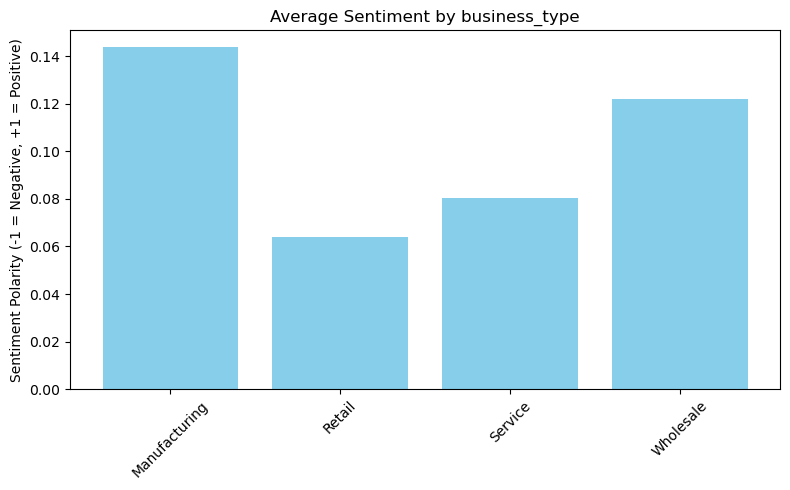

In [344]:
plt.figure(figsize=(8,5))
plt.bar(sentiment_summary[group_col], sentiment_summary['Sentiment'], color='skyblue')
plt.title(f"Average Sentiment by {group_col}")
plt.ylabel("Sentiment Polarity (-1 = Negative, +1 = Positive)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()